In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for practise refer below one for proper eda


In [ ]:
df=pd.read_csv('/content/fifa_eda.csv')

In [ ]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [ ]:
df.shape

(18207, 18)

In [ ]:
df.drop(['ID','Name','Contract Valid Until'],axis=1,inplace=True)
#drop the element which r just the name or identity of the particular person

In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause
0,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,5.583333,159.0,226500.0
1,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,6.166667,183.0,127100.0
2,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,5.750000,150.0,228100.0
3,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,6.333333,168.0,138600.0
4,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,5.916667,154.0,196400.0


In [ ]:
df.isnull().sum()

Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [ ]:
df['Skill Moves'].unique()

array([ 4.,  5.,  1.,  3.,  2., nan])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


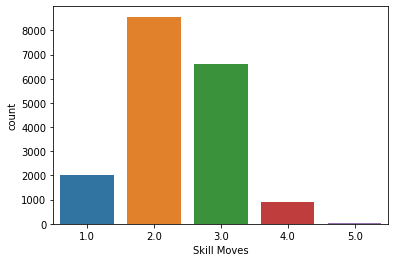

In [ ]:
sns.countplot(df['Skill Moves'])

In [ ]:
df['International Reputation'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [ ]:
df[['International Reputation','Skill Moves']].corr()

,International Reputation,Skill Moves
International Reputation,1.000000,0.208153
Skill Moves,0.208153,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


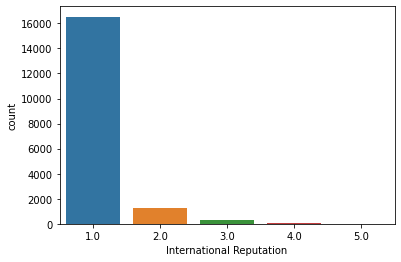

In [ ]:
sns.countplot(df['International Reputation'])

In [ ]:
#df['Skill Moves'].mean()
df['Skill Moves'].median()

2.0

In [ ]:
df['International Reputation'].median()

1.0

In [ ]:
df['Skill Moves']=df['Skill Moves'].fillna(df['Skill Moves'].median())

In [ ]:
df['International Reputation']=df['International Reputation'].fillna(df['International Reputation'].median())

In [ ]:
df[['Value','Wage']]

,Value,Wage
0,110500.0,565.0
1,77000.0,405.0
2,118500.0,290.0
3,72000.0,260.0
4,102000.0,355.0
...,...,...
18202,60.0,1.0
18203,60.0,1.0
18204,60.0,1.0
18205,60.0,1.0


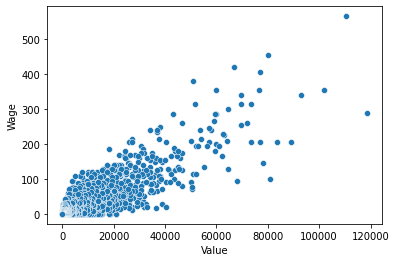

In [ ]:
sns.scatterplot(x=df['Value'],y=df['Wage'])

In [ ]:
df[['Value','Wage']].corr()
#we get to know that value and wage are highly correlated
#and wage have to missing values and "values" columns have missing value so we drop value from the data set

,Value,Wage
Value,1.000000,0.858086
Wage,0.858086,1.000000


In [ ]:
df.drop('Value',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Wage                          0
Preferred Foot                0
International Reputation      0
Skill Moves                   0
Position                      0
Joined                        0
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [ ]:
df['Club'].nunique()

651

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


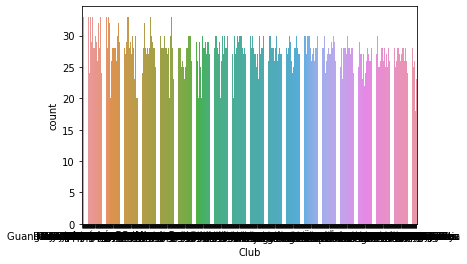

In [ ]:
sns.countplot(df['Club'])

In [ ]:
df[df['Nationality']=='Argentina']['Club'].nunique()

182

In [ ]:
df['Nationality'].nunique()

164

In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause
0,31,Argentina,94,94,FC Barcelona,565.0,Left,5.0,4.0,RF,2004,5.583333,159.0,226500.0
1,33,Portugal,94,94,Juventus,405.0,Right,5.0,5.0,ST,2018,6.166667,183.0,127100.0
2,26,Brazil,92,93,Paris Saint-Germain,290.0,Right,5.0,5.0,LW,2017,5.750000,150.0,228100.0
3,27,Spain,91,93,Manchester United,260.0,Right,4.0,1.0,GK,2011,6.333333,168.0,138600.0
4,27,Belgium,91,92,Manchester City,355.0,Right,4.0,4.0,RCM,2015,5.916667,154.0,196400.0


In [ ]:
dummies=pd.get_dummies(df['Preferred Foot'],drop_first=True)

In [ ]:
dummies
#right=1

,Right
0,0
1,1
2,1
3,1
4,1
...,...
18202,1
18203,1
18204,1
18205,1


In [ ]:
df=df.join(dummies)

In [ ]:
df

,Age,Nationality,Overall,Potential,Club,Wage,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Right
0,31,Argentina,94,94,FC Barcelona,565.0,5.0,4.0,RF,2004,5.583333,159.0,226500.0,0
1,33,Portugal,94,94,Juventus,405.0,5.0,5.0,ST,2018,6.166667,183.0,127100.0,1
2,26,Brazil,92,93,Paris Saint-Germain,290.0,5.0,5.0,LW,2017,5.750000,150.0,228100.0,1
3,27,Spain,91,93,Manchester United,260.0,4.0,1.0,GK,2011,6.333333,168.0,138600.0,1
4,27,Belgium,91,92,Manchester City,355.0,4.0,4.0,RCM,2015,5.916667,154.0,196400.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,1.0,1.0,2.0,CM,2017,5.750000,134.0,143.0,1
18203,19,Sweden,47,63,Trelleborgs FF,1.0,1.0,2.0,ST,2018,6.250000,170.0,113.0,1
18204,16,England,47,67,Cambridge United,1.0,1.0,2.0,ST,2017,5.666667,148.0,165.0,1
18205,17,England,47,66,Tranmere Rovers,1.0,1.0,2.0,RW,2018,5.833333,154.0,143.0,1


In [ ]:
X=df.drop('Club',axis=1)

In [ ]:
y=df['Club']

In [ ]:
df_temp=df
#making similar data set   for clasification

In [ ]:
#finding the missing values using logistic reg
from sklearn.linear_model import LogisticRegression

In [ ]:
mis_mod=LogisticRegression()
#mis_mod==missing model

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df1 = df_temp.apply(lambda col: le.fit_transform(col), axis=0, result_type='expand')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Wage                      18207 non-null  float64
 6   International Reputation  18207 non-null  float64
 7   Skill Moves               18207 non-null  float64
 8   Position                  18207 non-null  object 
 9   Joined                    18207 non-null  int64  
 10  Height                    18207 non-null  float64
 11  Weight                    18207 non-null  float64
 12  Release Clause            18207 non-null  float64
 13  Right                     18207 non-null  uint8  
dtypes: flo

In [ ]:
df1

,Age,Nationality,Overall,Potential,Club,Wage,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Right
0,15,6,47,45,212,142,4,3,21,7,6,21,1243,0
1,17,122,47,45,326,139,4,4,26,21,14,33,1227,1
2,10,20,46,44,435,133,4,4,14,20,8,17,1244,1
3,11,138,45,44,375,130,3,0,5,14,16,26,1230,1
4,11,13,45,43,374,137,3,3,19,18,10,19,1242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,3,46,1,16,165,0,0,1,4,20,8,10,93,1
18203,3,143,1,14,587,0,0,1,26,21,15,27,67,1
18204,0,46,1,18,122,0,0,1,26,20,7,16,114,1
18205,1,46,1,17,586,0,0,1,24,21,9,19,93,1


In [ ]:
df1=df1.dropna()

In [ ]:
X_train=df1.drop('Club',axis=1)
y_train=df1['Club']

In [ ]:
mis_mod.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
nul_col=df[df['Club'].isnull()]
#new column which only has null value in club row

In [ ]:
nul_col = nul_col.apply(lambda col: le.fit_transform(col), axis=0, result_type='expand')

In [ ]:
x_test=nul_col.drop('Club',axis=1)

NameError: ignored

In [ ]:
mis_val=mis_mod.predict(x_test)

In [ ]:
nul_col

,Age,Nationality,Overall,Potential,Club,Wage,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Right
452,6,0,27,28,0,0,1,3,3,0,6,13,0,1
538,15,24,27,24,0,0,1,1,6,0,11,22,0,1
568,8,21,26,25,0,0,0,0,4,0,9,18,0,1
677,11,21,26,23,0,0,1,2,12,0,5,8,0,1
874,11,21,25,22,0,0,1,2,19,0,12,28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,3,13,2,8,0,0,0,0,4,0,9,18,0,1
17215,8,9,2,1,0,0,0,1,12,0,11,23,0,1
17339,5,13,1,7,0,0,0,1,16,0,4,3,0,1
17436,2,13,1,11,0,0,0,1,4,0,7,14,0,1


2nd practise on same data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/fifa_eda.csv')

In [ ]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0


In [ ]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [ ]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


#refer some of the topic from above(why i had drop that particular colmuns)

In [ ]:
df.drop(['ID','Value','Joined','Contract Valid Until','Name'],axis=1,inplace=True)

In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Height,Weight,Release Clause
0,31,Argentina,94,94,FC Barcelona,565.0,Left,5.0,4.0,RF,5.583333,159.0,226500.0
1,33,Portugal,94,94,Juventus,405.0,Right,5.0,5.0,ST,6.166667,183.0,127100.0
2,26,Brazil,92,93,Paris Saint-Germain,290.0,Right,5.0,5.0,LW,5.750000,150.0,228100.0
3,27,Spain,91,93,Manchester United,260.0,Right,4.0,1.0,GK,6.333333,168.0,138600.0
4,27,Belgium,91,92,Manchester City,355.0,Right,4.0,4.0,RCM,5.916667,154.0,196400.0


In [ ]:
df['Preferred Foot']=pd.get_dummies(df['Preferred Foot'])

In [ ]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [ ]:
df['Position']=df['Position'].replace(['GK','ST','RCB','CB','LCB','LB','RB','RWB','LWB'],'B')

In [ ]:
df['Position']=df['Position'].replace(['RCM','LCM','LDM','CAM','CDM','RM','LAM','LM','RDM','CM','RAM'],'M')

In [ ]:
df['Position']=df['Position'].replace(['LW','LF','RW','CF','RF','RS'],'F')

In [ ]:
df['Position'].unique()

array(['F', 'B', 'M', 'LS'], dtype=object)

In [ ]:
df['Position']=df['Position'].replace('LS','F')

In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Height,Weight,Release Clause
0,31,Argentina,94,94,FC Barcelona,565.0,1,5.0,4.0,F,5.583333,159.0,226500.0
1,33,Portugal,94,94,Juventus,405.0,0,5.0,5.0,B,6.166667,183.0,127100.0
2,26,Brazil,92,93,Paris Saint-Germain,290.0,0,5.0,5.0,F,5.750000,150.0,228100.0
3,27,Spain,91,93,Manchester United,260.0,0,4.0,1.0,B,6.333333,168.0,138600.0
4,27,Belgium,91,92,Manchester City,355.0,0,4.0,4.0,M,5.916667,154.0,196400.0


In [ ]:
a=pd.get_dummies(df['Position'],drop_first=True)

In [ ]:
a

,F,M
0,1,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
18202,0,1
18203,0,0
18204,0,0
18205,1,0


In [ ]:
df=df.join(a)

In [ ]:
df.drop('Position',axis=1,inplace=True)

In [ ]:
df.head(1)

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,Argentina,94,94,FC Barcelona,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
a=le.fit_transform(df['Nationality'])

In [ ]:
df['Nationality']=a

In [ ]:
df

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,FC Barcelona,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0
1,33,123,94,94,Juventus,405.0,0,5.0,5.0,6.166667,183.0,127100.0,0,0
2,26,20,92,93,Paris Saint-Germain,290.0,0,5.0,5.0,5.750000,150.0,228100.0,1,0
3,27,139,91,93,Manchester United,260.0,0,4.0,1.0,6.333333,168.0,138600.0,0,0
4,27,13,91,92,Manchester City,355.0,0,4.0,4.0,5.916667,154.0,196400.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,46,47,65,Crewe Alexandra,1.0,0,1.0,2.0,5.750000,134.0,143.0,0,1
18203,19,144,47,63,Trelleborgs FF,1.0,0,1.0,2.0,6.250000,170.0,113.0,0,0
18204,16,46,47,67,Cambridge United,1.0,0,1.0,2.0,5.666667,148.0,165.0,0,0
18205,17,46,47,66,Tranmere Rovers,1.0,0,1.0,2.0,5.833333,154.0,143.0,1,0


In [ ]:
le.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad',
       'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'FYR Macedonia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 

In [ ]:
le.inverse_transform(df['Nationality'])

array(['Argentina', 'Portugal', 'Brazil', ..., 'England', 'England',
       'England'], dtype=object)

In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,FC Barcelona,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0
1,33,123,94,94,Juventus,405.0,0,5.0,5.0,6.166667,183.0,127100.0,0,0
2,26,20,92,93,Paris Saint-Germain,290.0,0,5.0,5.0,5.750000,150.0,228100.0,1,0
3,27,139,91,93,Manchester United,260.0,0,4.0,1.0,6.333333,168.0,138600.0,0,0
4,27,13,91,92,Manchester City,355.0,0,4.0,4.0,5.916667,154.0,196400.0,0,1


In [ ]:
len(df['Nationality']==139)

18207

In [ ]:
df['Club'].isnull().sum()

241

In [ ]:
df_no=df.dropna()

In [ ]:
x_train=df_no.drop('Club',axis=1)
x_test=df[df['Club'].isnull()]
x_test=x_test.drop('Club',axis=1)
y_train=df_no['Club']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
null_value=model.predict(x_test)

In [ ]:
null_value

array(['Tottenham Hotspur', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao', 'Chelsea',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Athletic Club de Bilbao', 'Athletic Club de Bilbao',
       'Atlético Madrid', 'Athletic Club de Bilbao',
       'Athletic Club de Bi

In [ ]:
val=pd.DataFrame(null_value)

In [ ]:
val

,0
0,Tottenham Hotspur
1,Athletic Club de Bilbao
2,Athletic Club de Bilbao
3,Athletic Club de Bilbao
4,Athletic Club de Bilbao
...,...
236,Athletic Club de Bilbao
237,Athletic Club de Bilbao
238,Atlético Madrid
239,Athletic Club de Bilbao


In [ ]:
df.isnull().sum()

Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Height                        0
Weight                        0
Release Clause                0
F                             0
M                             0
dtype: int64

In [ ]:
df['International Reputation']=df['International Reputation'].fillna(df['International Reputation'].median())

In [ ]:
df['Skill Moves']=df['Skill Moves'].fillna(df['Skill Moves'].median())

In [ ]:
df

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,FC Barcelona,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0
1,33,123,94,94,Juventus,405.0,0,5.0,5.0,6.166667,183.0,127100.0,0,0
2,26,20,92,93,Paris Saint-Germain,290.0,0,5.0,5.0,5.750000,150.0,228100.0,1,0
3,27,139,91,93,Manchester United,260.0,0,4.0,1.0,6.333333,168.0,138600.0,0,0
4,27,13,91,92,Manchester City,355.0,0,4.0,4.0,5.916667,154.0,196400.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,46,47,65,Crewe Alexandra,1.0,0,1.0,2.0,5.750000,134.0,143.0,0,1
18203,19,144,47,63,Trelleborgs FF,1.0,0,1.0,2.0,6.250000,170.0,113.0,0,0
18204,16,46,47,67,Cambridge United,1.0,0,1.0,2.0,5.666667,148.0,165.0,0,0
18205,17,46,47,66,Tranmere Rovers,1.0,0,1.0,2.0,5.833333,154.0,143.0,1,0


In [ ]:
a=df[df['Club'].isnull()]

In [ ]:
a

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
452,24,6,80,85,NaN,0.0,0,2.0,4.0,5.916667,165.0,4585.060806,0,1
538,33,144,80,80,NaN,0.0,0,2.0,2.0,6.333333,185.0,4585.060806,0,0
568,26,128,79,81,NaN,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0
677,29,128,79,79,NaN,0.0,0,2.0,3.0,5.833333,154.0,4585.060806,0,0
874,29,128,78,78,NaN,0.0,0,2.0,3.0,6.416667,201.0,4585.060806,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,55,64,NaN,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0
17215,26,54,55,57,NaN,0.0,0,1.0,2.0,6.333333,187.0,4585.060806,0,0
17339,23,73,54,63,NaN,0.0,0,1.0,2.0,5.750000,143.0,4585.060806,0,1
17436,20,73,54,67,NaN,0.0,0,1.0,2.0,6.000000,168.0,4585.060806,0,0


In [ ]:
a.drop('Club',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
a

,Age,Nationality,Overall,Potential,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
452,24,6,80,85,0.0,0,2.0,4.0,5.916667,165.0,4585.060806,0,1
538,33,144,80,80,0.0,0,2.0,2.0,6.333333,185.0,4585.060806,0,0
568,26,128,79,81,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0
677,29,128,79,79,0.0,0,2.0,3.0,5.833333,154.0,4585.060806,0,0
874,29,128,78,78,0.0,0,2.0,3.0,6.416667,201.0,4585.060806,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,55,64,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0
17215,26,54,55,57,0.0,0,1.0,2.0,6.333333,187.0,4585.060806,0,0
17339,23,73,54,63,0.0,0,1.0,2.0,5.750000,143.0,4585.060806,0,1
17436,20,73,54,67,0.0,0,1.0,2.0,6.000000,168.0,4585.060806,0,0


In [ ]:
val.index=a.index

In [ ]:
a=a.join(val)

In [ ]:
a

,Age,Nationality,Overall,Potential,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M,0
452,24,6,80,85,0.0,0,2.0,4.0,5.916667,165.0,4585.060806,0,1,Tottenham Hotspur
538,33,144,80,80,0.0,0,2.0,2.0,6.333333,185.0,4585.060806,0,0,Athletic Club de Bilbao
568,26,128,79,81,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0,Athletic Club de Bilbao
677,29,128,79,79,0.0,0,2.0,3.0,5.833333,154.0,4585.060806,0,0,Athletic Club de Bilbao
874,29,128,78,78,0.0,0,2.0,3.0,6.416667,201.0,4585.060806,0,0,Athletic Club de Bilbao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,55,64,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0,Athletic Club de Bilbao
17215,26,54,55,57,0.0,0,1.0,2.0,6.333333,187.0,4585.060806,0,0,Athletic Club de Bilbao
17339,23,73,54,63,0.0,0,1.0,2.0,5.750000,143.0,4585.060806,0,1,Atlético Madrid
17436,20,73,54,67,0.0,0,1.0,2.0,6.000000,168.0,4585.060806,0,0,Athletic Club de Bilbao


In [ ]:
df1=df[df['Club'].notnull()]

In [ ]:
a

,Age,Nationality,Overall,Potential,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M,0
452,24,6,80,85,0.0,0,2.0,4.0,5.916667,165.0,4585.060806,0,1,Tottenham Hotspur
538,33,144,80,80,0.0,0,2.0,2.0,6.333333,185.0,4585.060806,0,0,Athletic Club de Bilbao
568,26,128,79,81,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0,Athletic Club de Bilbao
677,29,128,79,79,0.0,0,2.0,3.0,5.833333,154.0,4585.060806,0,0,Athletic Club de Bilbao
874,29,128,78,78,0.0,0,2.0,3.0,6.416667,201.0,4585.060806,0,0,Athletic Club de Bilbao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,55,64,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0,Athletic Club de Bilbao
17215,26,54,55,57,0.0,0,1.0,2.0,6.333333,187.0,4585.060806,0,0,Athletic Club de Bilbao
17339,23,73,54,63,0.0,0,1.0,2.0,5.750000,143.0,4585.060806,0,1,Atlético Madrid
17436,20,73,54,67,0.0,0,1.0,2.0,6.000000,168.0,4585.060806,0,0,Athletic Club de Bilbao


In [ ]:
a=a.rename(columns={0: 'Club'})

In [ ]:
a.head(2)

,Age,Nationality,Overall,Potential,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M,Club
452,24,6,80,85,0.0,0,2.0,4.0,5.916667,165.0,4585.060806,0,1,Tottenham Hotspur
538,33,144,80,80,0.0,0,2.0,2.0,6.333333,185.0,4585.060806,0,0,Athletic Club de Bilbao


In [ ]:
df1.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,FC Barcelona,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0
1,33,123,94,94,Juventus,405.0,0,5.0,5.0,6.166667,183.0,127100.0,0,0
2,26,20,92,93,Paris Saint-Germain,290.0,0,5.0,5.0,5.750000,150.0,228100.0,1,0
3,27,139,91,93,Manchester United,260.0,0,4.0,1.0,6.333333,168.0,138600.0,0,0
4,27,13,91,92,Manchester City,355.0,0,4.0,4.0,5.916667,154.0,196400.0,0,1


In [ ]:
a=a[['Age','Nationality','Overall','Potential','Club','Wage','Preferred Foot','International Reputation','Skill Moves','Height','Weight','Release Clause','F','M']]

In [ ]:
df=pd.concat([df1,a])

In [ ]:
df.isnull().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Height                      0
Weight                      0
Release Clause              0
F                           0
M                           0
dtype: int64

In [ ]:
df
#here all the cleaning part is completed

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,FC Barcelona,565.0,1,5.0,4.0,5.583333,159.0,226500.000000,1,0
1,33,123,94,94,Juventus,405.0,0,5.0,5.0,6.166667,183.0,127100.000000,0,0
2,26,20,92,93,Paris Saint-Germain,290.0,0,5.0,5.0,5.750000,150.0,228100.000000,1,0
3,27,139,91,93,Manchester United,260.0,0,4.0,1.0,6.333333,168.0,138600.000000,0,0
4,27,13,91,92,Manchester City,355.0,0,4.0,4.0,5.916667,154.0,196400.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,55,64,Athletic Club de Bilbao,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0
17215,26,54,55,57,Athletic Club de Bilbao,0.0,0,1.0,2.0,6.333333,187.0,4585.060806,0,0
17339,23,73,54,63,Atlético Madrid,0.0,0,1.0,2.0,5.750000,143.0,4585.060806,0,1
17436,20,73,54,67,Athletic Club de Bilbao,0.0,0,1.0,2.0,6.000000,168.0,4585.060806,0,0


In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,212,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0
1,33,123,94,94,326,405.0,0,5.0,5.0,6.166667,183.0,127100.0,0,0
2,26,20,92,93,435,290.0,0,5.0,5.0,5.750000,150.0,228100.0,1,0
3,27,139,91,93,375,260.0,0,4.0,1.0,6.333333,168.0,138600.0,0,0
4,27,13,91,92,374,355.0,0,4.0,4.0,5.916667,154.0,196400.0,0,1


In [ ]:
df['Club']=le.fit_transform(df['Club'])

In [ ]:
df.head()

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,212,565.0,1,5.0,4.0,5.583333,159.0,226500.0,1,0
1,33,123,94,94,326,405.0,0,5.0,5.0,6.166667,183.0,127100.0,0,0
2,26,20,92,93,435,290.0,0,5.0,5.0,5.750000,150.0,228100.0,1,0
3,27,139,91,93,375,260.0,0,4.0,1.0,6.333333,168.0,138600.0,0,0
4,27,13,91,92,374,355.0,0,4.0,4.0,5.916667,154.0,196400.0,0,1


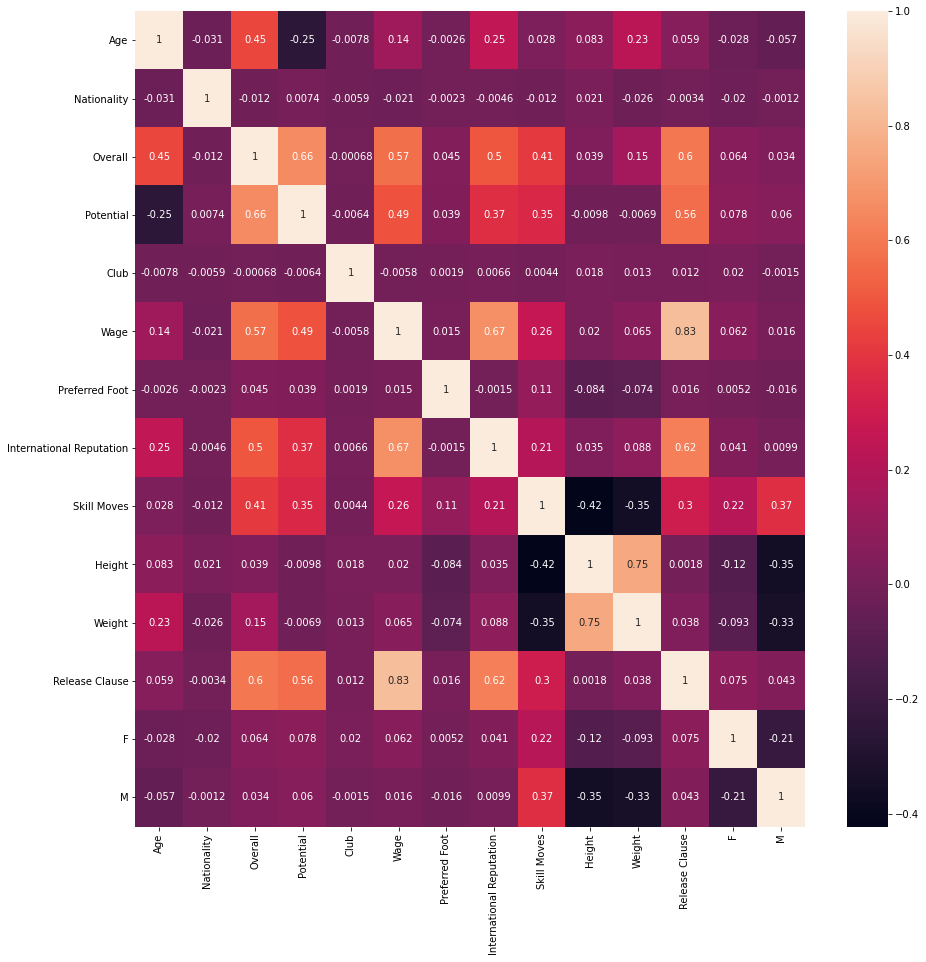

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
def correlation(dataset,thre):
  corr=set()
  cor_mat=dataset.corr()
  for i in range(len(cor_mat.columns)):
    for j in range (i):
      if(cor_mat.iloc[i,j])>thre:
        colname=cor_mat.columns[i]
        corr.add(colname)
  return corr

In [ ]:
X=df.drop('Overall',axis=1)
y=df['Overall']

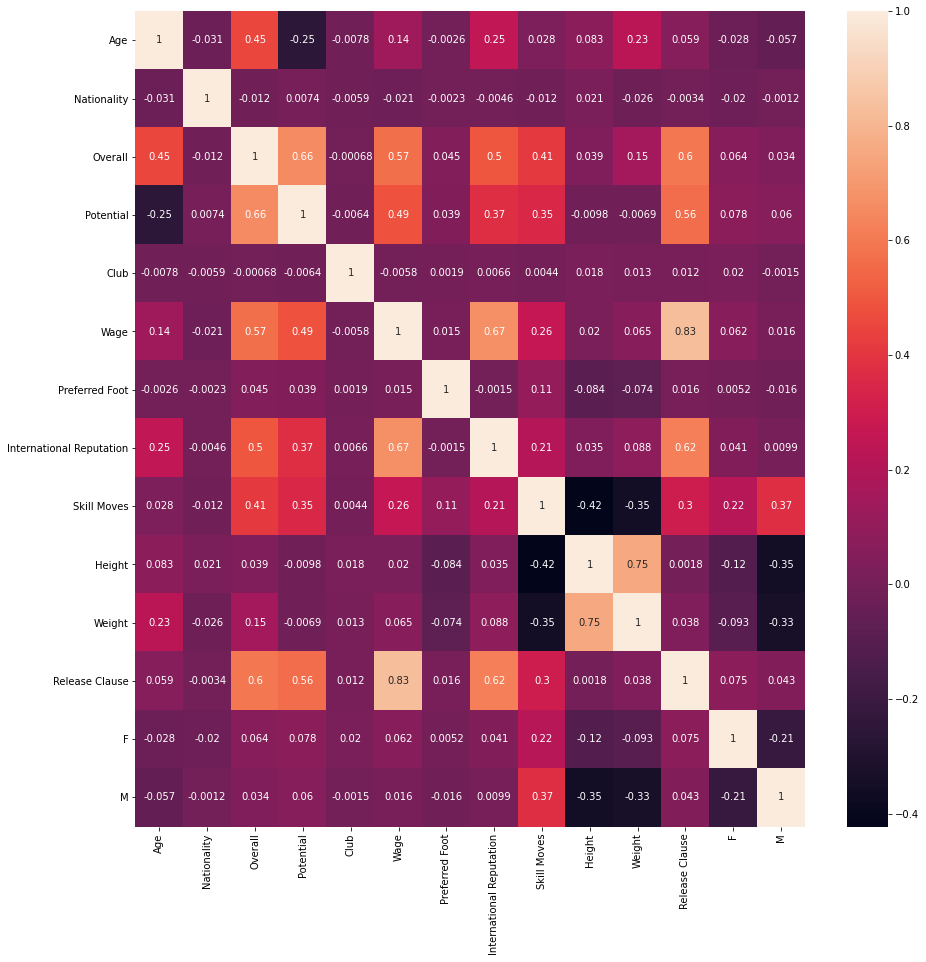

In [ ]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True)

In [ ]:
extra=correlation(X,0.8)

In [ ]:
X.drop(extra,axis=1,inplace=True)

In [ ]:
X

,Age,Nationality,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,F,M
0,31,6,94,212,565.0,1,5.0,4.0,5.583333,159.0,1,0
1,33,123,94,326,405.0,0,5.0,5.0,6.166667,183.0,0,0
2,26,20,93,435,290.0,0,5.0,5.0,5.750000,150.0,1,0
3,27,139,93,375,260.0,0,4.0,1.0,6.333333,168.0,0,0
4,27,13,92,374,355.0,0,4.0,4.0,5.916667,154.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,64,56,0.0,0,1.0,1.0,6.166667,176.0,0,0
17215,26,54,57,56,0.0,0,1.0,2.0,6.333333,187.0,0,0
17339,23,73,63,61,0.0,0,1.0,2.0,5.750000,143.0,0,1
17436,20,73,67,56,0.0,0,1.0,2.0,6.000000,168.0,0,0


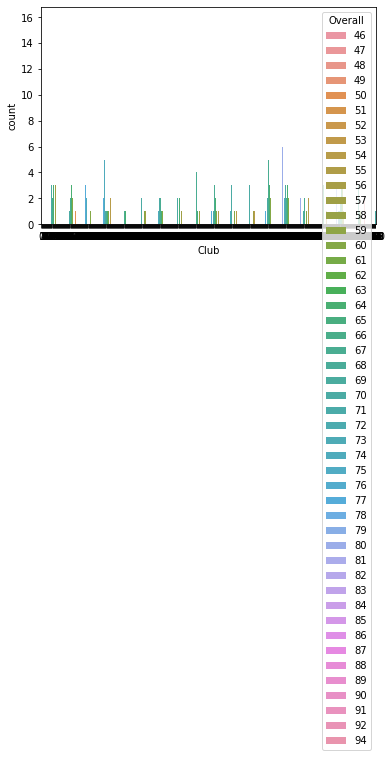

In [ ]:
sns.countplot(x=X['Club'],hue=y)

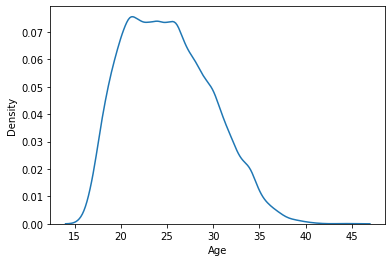

In [ ]:
sns.kdeplot(x=X['Age'])
#most of the players r in the age of 20-30

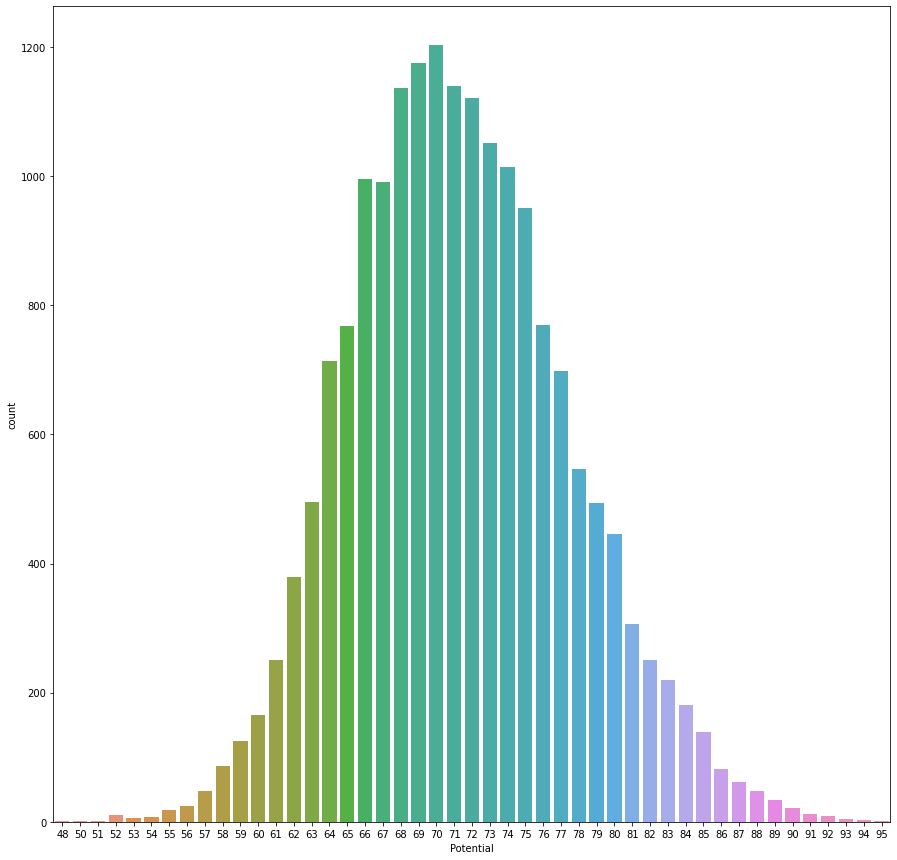

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=X['Potential'])

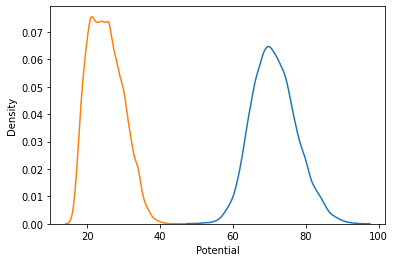

In [ ]:
sns.kdeplot(X['Potential'])
sns.kdeplot(X['Age'])

In [ ]:
X['Age'].min()

16

In [ ]:
X['Age'].max()

45

In [ ]:
X['Age'].corr(X['Potential'])

-0.2533121074109557

In [ ]:
#by this we can seee in staring whent the age is incersasing potential is increasing
#but after some time they both become inverse of each other

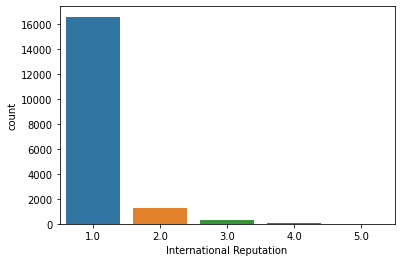

In [ ]:
sns.countplot(x=X['International Reputation'])

In [ ]:
X

,Age,Nationality,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,F,M
0,31,6,94,212,565.0,1,5.0,4.0,5.583333,159.0,1,0
1,33,123,94,326,405.0,0,5.0,5.0,6.166667,183.0,0,0
2,26,20,93,435,290.0,0,5.0,5.0,5.750000,150.0,1,0
3,27,139,93,375,260.0,0,4.0,1.0,6.333333,168.0,0,0
4,27,13,92,374,355.0,0,4.0,4.0,5.916667,154.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,64,56,0.0,0,1.0,1.0,6.166667,176.0,0,0
17215,26,54,57,56,0.0,0,1.0,2.0,6.333333,187.0,0,0
17339,23,73,63,61,0.0,0,1.0,2.0,5.750000,143.0,0,1
17436,20,73,67,56,0.0,0,1.0,2.0,6.000000,168.0,0,0


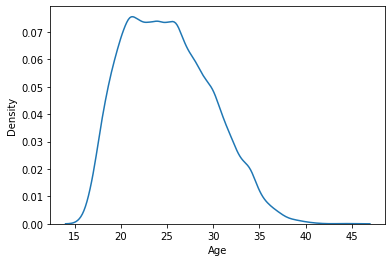

In [ ]:
sns.kdeplot(x=X['Age'])

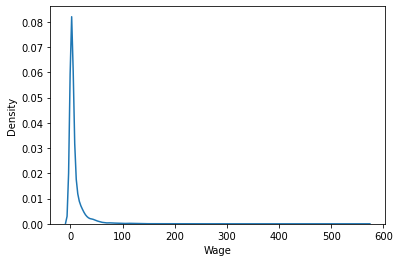

In [ ]:
sns.kdeplot(x=X['Wage'])

In [ ]:
df[df['Wage']==0]['International Reputation'].unique()

array([2., 1., 3.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


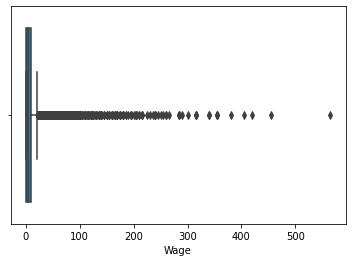

In [ ]:
sns.boxplot(X['Wage'])

In [ ]:
fd=df[df['Wage']==0].value_counts()

In [ ]:
fd

Age  Nationality  Overall  Potential  Club  Wage  Preferred Foot  International Reputation  Skill Moves  Height    Weight  Release Clause  F  M
41   119          77       77         56    0.0   0               2.0                       1.0          5.916667  187.0   4585.060806     0  0    1
26   110          62       64         56    0.0   0               1.0                       2.0          5.916667  170.0   4585.060806     0  0    1
25   43           65       71         134   0.0   0               1.0                       1.0          6.000000  172.0   4585.060806     0  0    1
     21           68       73         583   0.0   1               1.0                       3.0          5.750000  154.0   4585.060806     0  1    1
     17           66       71         583   0.0   0               1.0                       1.0          6.250000  176.0   4585.060806     0  0    1
                                                                                                               

In [ ]:
df['Wage'].corr(df['Overall'])

0.5719260112876148

In [ ]:
mean=X['Wage'].mean()

In [ ]:
X['Wage']=X['Wage'].replace(0,mean)

In [ ]:
X

,Age,Nationality,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,F,M
0,31,6,94,212,565.000000,1,5.0,4.0,5.583333,159.0,1,0
1,33,123,94,326,405.000000,0,5.0,5.0,6.166667,183.0,0,0
2,26,20,93,435,290.000000,0,5.0,5.0,5.750000,150.0,1,0
3,27,139,93,375,260.000000,0,4.0,1.0,6.333333,168.0,0,0
4,27,13,92,374,355.000000,0,4.0,4.0,5.916667,154.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,64,56,9.731312,0,1.0,1.0,6.166667,176.0,0,0
17215,26,54,57,56,9.731312,0,1.0,2.0,6.333333,187.0,0,0
17339,23,73,63,61,9.731312,0,1.0,2.0,5.750000,143.0,0,1
17436,20,73,67,56,9.731312,0,1.0,2.0,6.000000,168.0,0,0


In [ ]:
mean

9.860122272970907

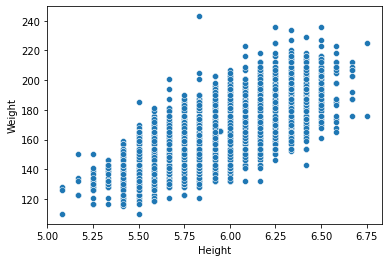

In [ ]:
sns.scatterplot(data=X,x='Height',y='Weight')

In [ ]:
df['Height'].corr(df['Weight'])

0.7546782163284695

In [ ]:
df['Potential'].corr(df['Weight'])

-0.006935283203108119

In [ ]:
df['Height'].corr(df['Potential'])

-0.009790742181975124

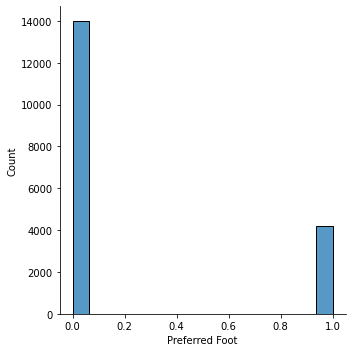

In [ ]:
sns.displot(df['Preferred Foot'])

In [ ]:
#most of them prefer foot in right

In [ ]:
df['Club'].value_counts().sort_values(ascending=False)
#club==156 people had more good results
#then 583 ans soon

56     182
583     97
61      52
134     40
206     33
      ... 
524     20
551     20
543     19
361     19
188     18
Name: Club, Length: 651, dtype: int64

In [ ]:
df

,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,Release Clause,F,M
0,31,6,94,94,212,565.0,1,5.0,4.0,5.583333,159.0,226500.000000,1,0
1,33,123,94,94,326,405.0,0,5.0,5.0,6.166667,183.0,127100.000000,0,0
2,26,20,92,93,435,290.0,0,5.0,5.0,5.750000,150.0,228100.000000,1,0
3,27,139,91,93,375,260.0,0,4.0,1.0,6.333333,168.0,138600.000000,0,0
4,27,13,91,92,374,355.0,0,4.0,4.0,5.916667,154.0,196400.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,55,64,56,0.0,0,1.0,1.0,6.166667,176.0,4585.060806,0,0
17215,26,54,55,57,56,0.0,0,1.0,2.0,6.333333,187.0,4585.060806,0,0
17339,23,73,54,63,61,0.0,0,1.0,2.0,5.750000,143.0,4585.060806,0,1
17436,20,73,54,67,56,0.0,0,1.0,2.0,6.000000,168.0,4585.060806,0,0


In [ ]:
X

,Age,Nationality,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,F,M
0,31,6,94,212,565.000000,1,5.0,4.0,5.583333,159.0,1,0
1,33,123,94,326,405.000000,0,5.0,5.0,6.166667,183.0,0,0
2,26,20,93,435,290.000000,0,5.0,5.0,5.750000,150.0,1,0
3,27,139,93,375,260.000000,0,4.0,1.0,6.333333,168.0,0,0
4,27,13,92,374,355.000000,0,4.0,4.0,5.916667,154.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,73,64,56,9.731312,0,1.0,1.0,6.166667,176.0,0,0
17215,26,54,57,56,9.731312,0,1.0,2.0,6.333333,187.0,0,0
17339,23,73,63,61,9.731312,0,1.0,2.0,5.750000,143.0,0,1
17436,20,73,67,56,9.731312,0,1.0,2.0,6.000000,168.0,0,0


In [ ]:
y.unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

In [ ]:
#so we found that the is is liner regeression model

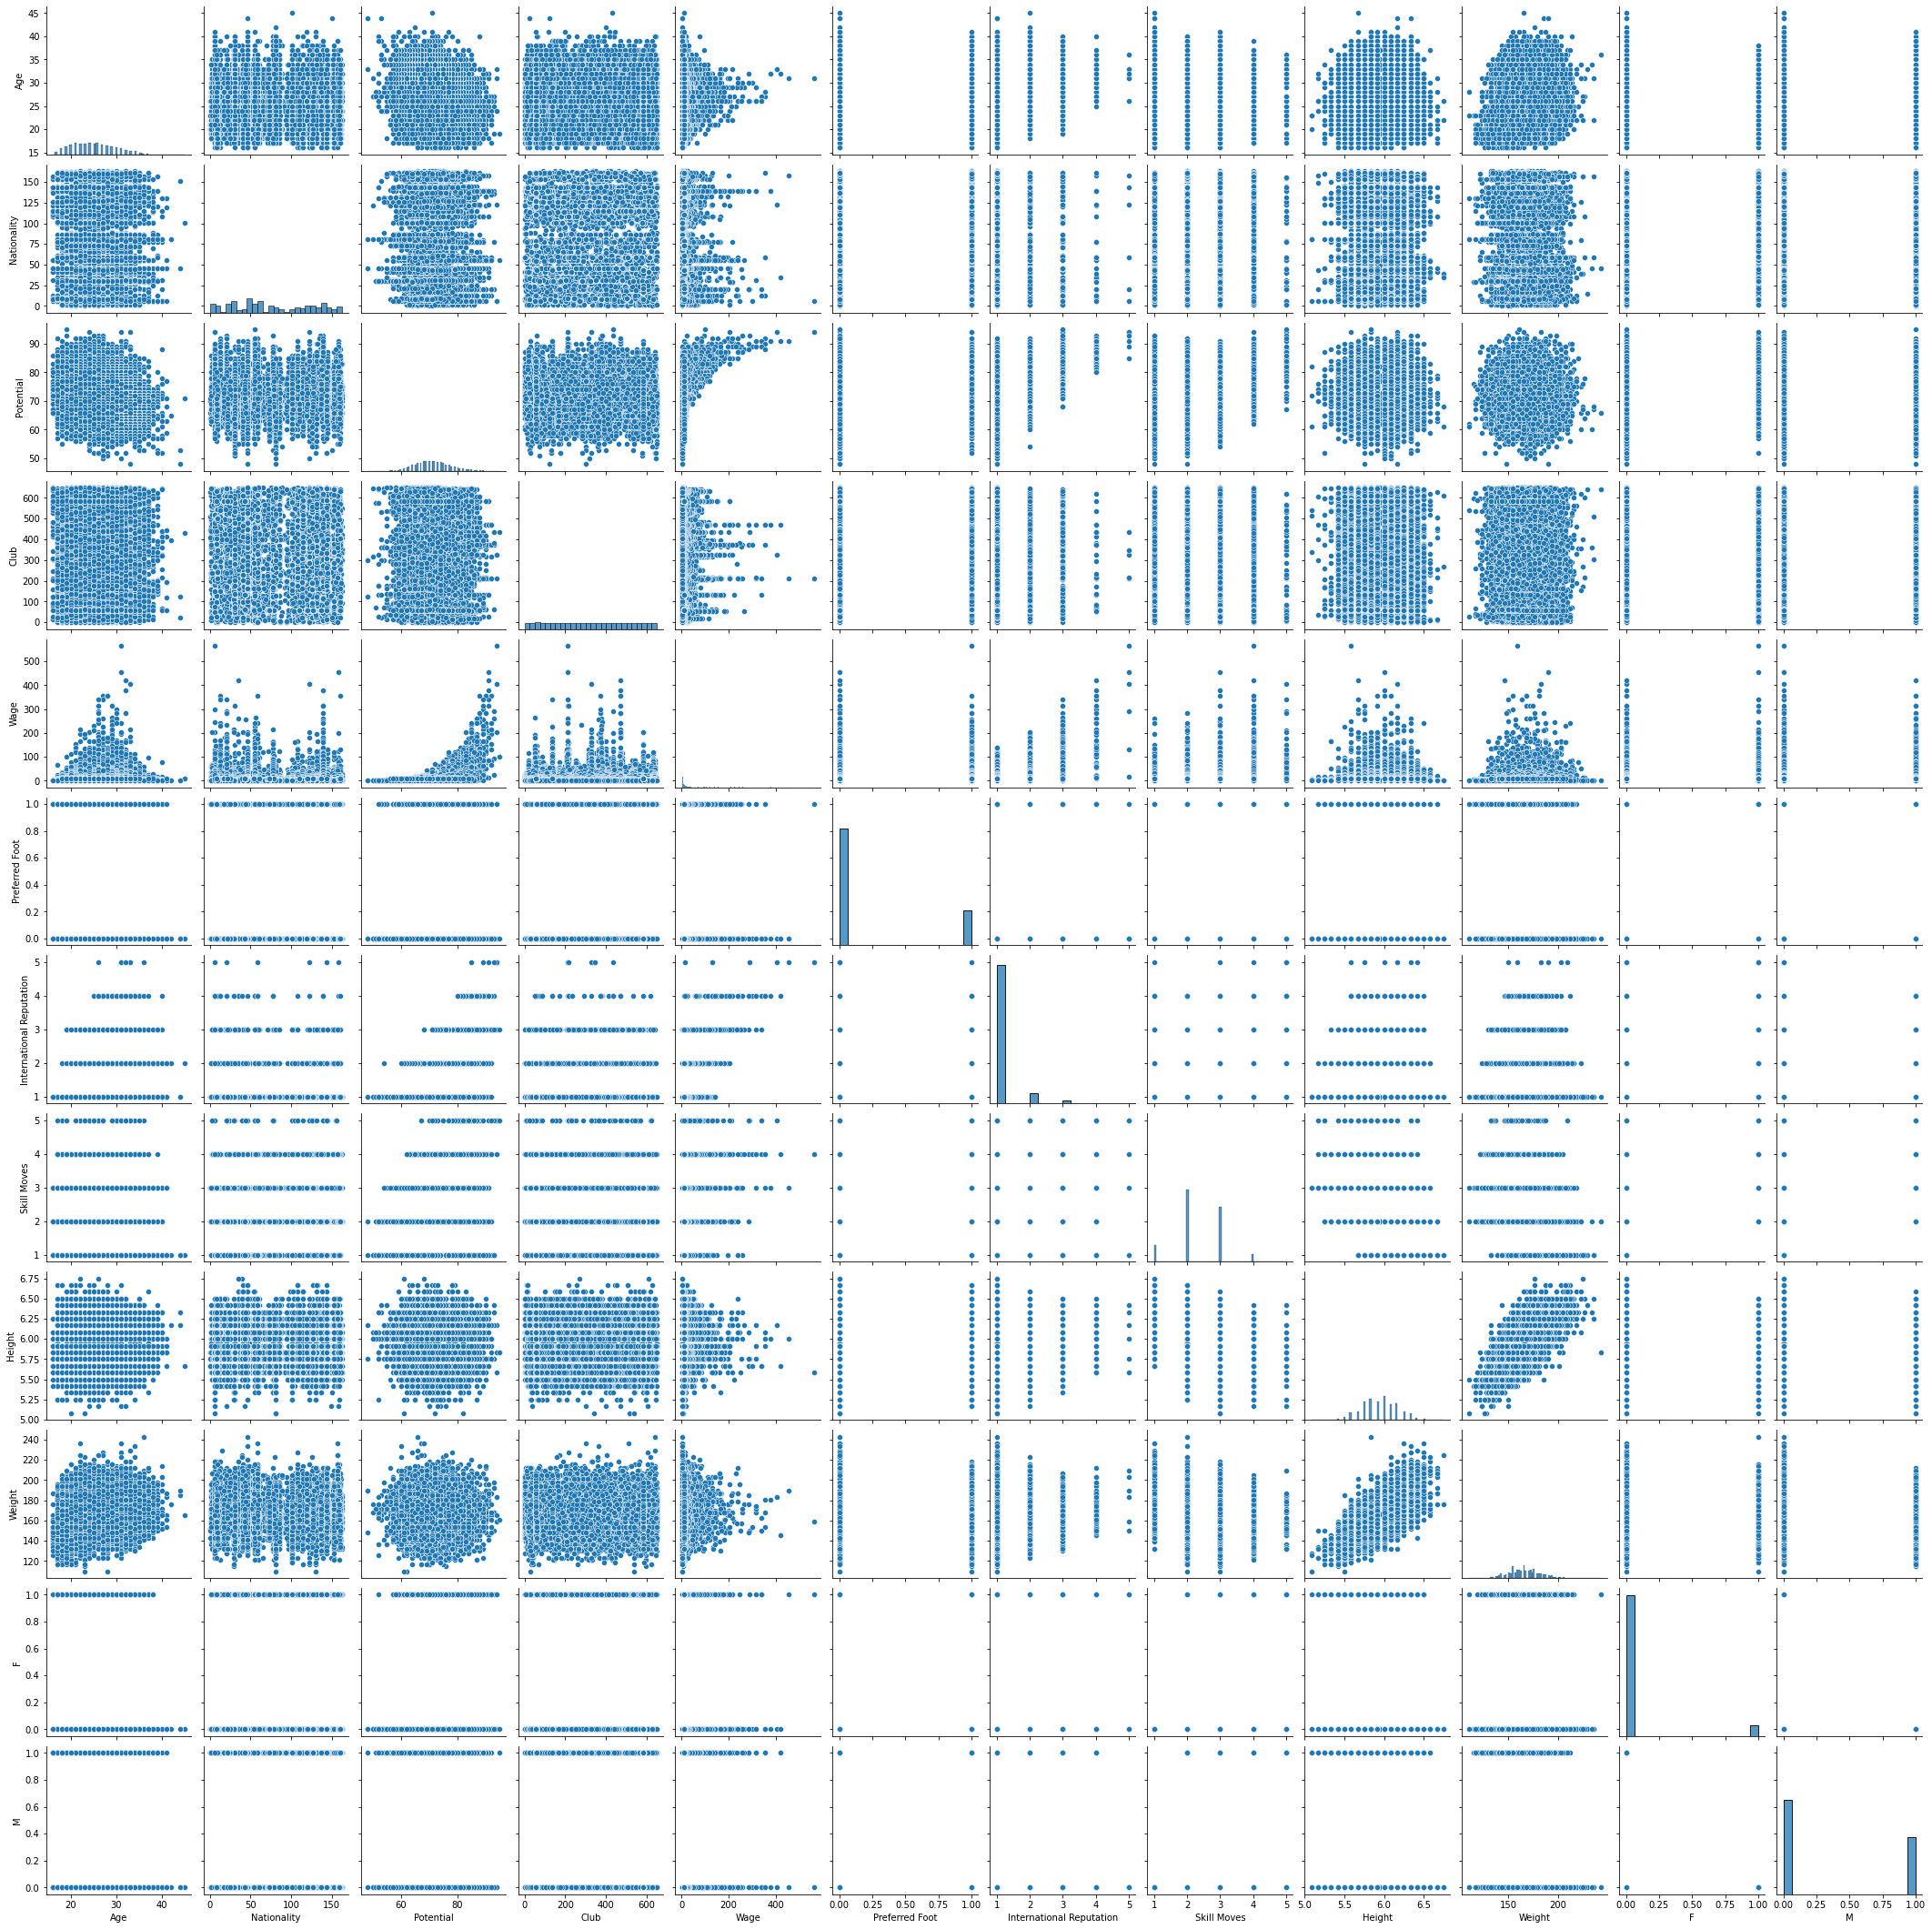

In [ ]:
sns.pairplot(data=X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


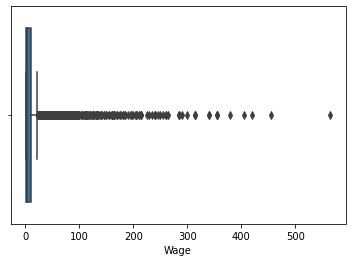

In [ ]:
sns.boxplot(X['Wage'])

In [ ]:
X.describe()

,Age,Nationality,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Height,Weight,F,M
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,76.136156,71.307299,322.845883,9.860122,0.231285,1.112924,2.360356,5.946771,165.979129,0.069534,0.375844
std,4.669943,47.834069,6.136496,189.300665,21.970403,0.421666,0.393554,0.755394,0.220514,15.572775,0.254366,0.484353
min,16.000000,0.000000,48.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.083333,110.000000,0.000000,0.000000
25%,21.000000,35.000000,67.000000,157.000000,1.000000,0.000000,1.000000,2.000000,5.750000,154.000000,0.000000,0.000000
50%,25.000000,59.000000,71.000000,323.000000,3.000000,0.000000,1.000000,2.000000,5.916667,165.000000,0.000000,0.000000
75%,28.000000,123.000000,75.000000,487.000000,9.731312,0.000000,1.000000,3.000000,6.083333,176.000000,0.000000,1.000000
max,45.000000,163.000000,95.000000,650.000000,565.000000,1.000000,5.000000,5.000000,6.750000,243.000000,1.000000,1.000000
